In [200]:
import pandas as pd
import glob
from azure.storage.blob.blockblobservice import BlockBlobService
import matplotlib.pyplot as plt
import numpy as np

## Data download

In [240]:
block_blob_service = BlockBlobService(account_name='activityprofiles', account_key='vx5JFWqh2ajuF6iQey3xj0o3BJ0o2EZaPxtS1ME28a/9y1+e06SYXnYWoMqhh4OaY5ZRf4wKmZXgJf3im0Bmuw==')

generator = block_blob_service.list_blobs('app')

fp = open('test.csv', 'bw')

for blob in generator:
    # Using `get_blob_to_bytes`
    b = block_blob_service.get_blob_to_bytes('app', blob.name)
    fp.write(b.content)
    # Or using `get_blob_to_stream`
    # service.get_blob_to_stream(container_name, blob.name, fp)

fp.flush()
fp.close()

Client-Request-ID=bd4db812-a1f8-11ec-99e1-000e7b3386f5 Retry policy did not allow for a retry: Server-Timestamp=Sat, 12 Mar 2022 11:37:04 GMT, Server-Request-ID=c0ce38e7-d01e-004d-5705-36cd06000000, HTTP status code=416, Exception=The range specified is invalid for the current size of the resource. ErrorCode: InvalidRange<?xml version="1.0" encoding="utf-8"?><Error><Code>InvalidRange</Code><Message>The range specified is invalid for the current size of the resource.RequestId:c0ce38e7-d01e-004d-5705-36cd06000000Time:2022-03-12T11:37:04.9476297Z</Message></Error>.
Client-Request-ID=c15ab75c-a1f8-11ec-b79b-000e7b3386f5 Retry policy did not allow for a retry: Server-Timestamp=Sat, 12 Mar 2022 11:37:11 GMT, Server-Request-ID=c0ce5950-d01e-004d-3d05-36cd06000000, HTTP status code=416, Exception=The range specified is invalid for the current size of the resource. ErrorCode: InvalidRange<?xml version="1.0" encoding="utf-8"?><Error><Code>InvalidRange</Code><Message>The range specified is invali

## Data cleaning

In [241]:
df = pd.read_csv('test.csv', index_col=None, header=None)
df.columns = ['time','name','activity','acc_x','acc_y','acc_z','mag_x','mag_y','mag_z','gyr_x','gyr_y','gyr_z','ori_x','ori_y','ori_z','ori_w','lat','long']
print(df.shape)
df

(267674, 18)


,time,name,activity,acc_x,acc_y,acc_z,mag_x,mag_y,mag_z,gyr_x,gyr_y,gyr_z,ori_x,ori_y,ori_z,ori_w,lat,long
0,04.03.2022 11:47:11.212,Raphi,Sitting,-0.091133,0.351148,0.945756,-23.01530,-26.72410,-33.40970,0.047035,-0.022907,0.008399,0.136017,-0.125171,-0.839552,0.510817,47.500155,8.324881
1,04.03.2022 11:47:11.268,Raphi,Sitting,-0.097963,0.366881,0.898528,-22.97260,-26.59600,-33.26940,-0.050089,-0.041232,-0.025808,0.135422,-0.126965,-0.839437,0.510728,47.500155,8.324881
2,04.03.2022 11:47:11.326,Raphi,Sitting,-0.114793,0.334654,0.998473,-22.77740,-26.51060,-33.09250,0.150879,-0.098041,0.096972,0.134209,-0.126197,-0.839677,0.510821,47.500155,8.324881
3,04.03.2022 11:47:11.388,Raphi,Sitting,-0.075767,0.364564,0.886332,-22.94210,-26.77900,-32.94610,0.196082,0.096208,-0.009926,0.134518,-0.133009,-0.839076,0.510125,47.500155,8.324881
4,04.03.2022 11:47:11.445,Raphi,Sitting,-0.125556,0.378345,0.905358,-23.32640,-27.35240,-32.97050,0.027488,0.019242,0.138510,0.139961,-0.133803,-0.836808,0.512193,47.500155,8.324881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267669,11.03.2022 14:02:02.426,test,Sitting,-0.282218,0.476336,0.710882,89.17389,32.92236,57.17773,-0.043945,0.154778,-0.014374,0.086396,0.291182,0.641433,0.704430,47.500152,8.324849
267670,11.03.2022 14:02:02.477,test,Sitting,-0.299881,0.485396,0.895328,89.61105,33.06885,57.10678,-0.078033,-0.059875,0.047409,0.083418,0.288458,0.643018,0.704540,47.500152,8.324849
267671,11.03.2022 14:02:02.528,test,Sitting,-0.298081,0.468678,0.778852,89.46533,33.02002,57.31964,0.142471,-0.074791,-0.068703,0.085800,0.289604,0.641242,0.705353,47.500152,8.324849
267672,11.03.2022 14:02:03.688,test,Sitting,-0.289906,0.477403,0.737729,85.97107,38.78174,55.61371,-0.061531,-0.126465,0.012253,0.075200,0.192672,0.674516,0.706957,47.500152,8.324849


In [242]:
 # drop test entry
 df_clean = df.loc[df['time'] != 'Test04.03.2022 07:48:54.917', :]

In [243]:
# convert datetime format
df_clean.loc[:, 'time'] = pd.to_datetime(df_clean.loc[:, 'time'] + '000')

C:\Users\Pascal\.virtualenvs\git_repo-G3UKNH-B\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [244]:
# drop all data before 3.3.2022, because of incorrect data loading
df_clean = df_clean[df_clean['time'] > pd.to_datetime('03.03.2022 08:00:00')]

In [270]:
df_clean['name'].unique()

array(['Raphi', 'pascal', 'Flavio', 'Ronny', 'Simon'], dtype=object)

In [268]:
# drop invalid user
df_clean = df_clean[df_clean['name'] != 'test']

In [271]:
df_clean.to_csv("df_clean.csv")

In [251]:
del df

## Data vlisualization

In [272]:
df_clean = pd.read_csv("df_clean.csv")
df_clean.shape

(264846, 20)

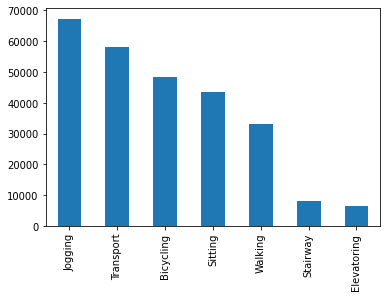

In [273]:
df_clean['activity'].value_counts().plot(kind='bar')
plt.show()

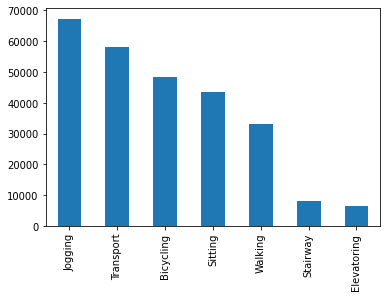

In [274]:
df_clean['activity'].value_counts().plot(kind='bar')
plt.show()

In [275]:
df_clean['activity'].value_counts()

Jogging        67225
Transport      57953
Bicycling      48446
Sitting        43518
Walking        33061
Stairway        8013
Elevatoring     6630
Name: activity, dtype: int64

[]

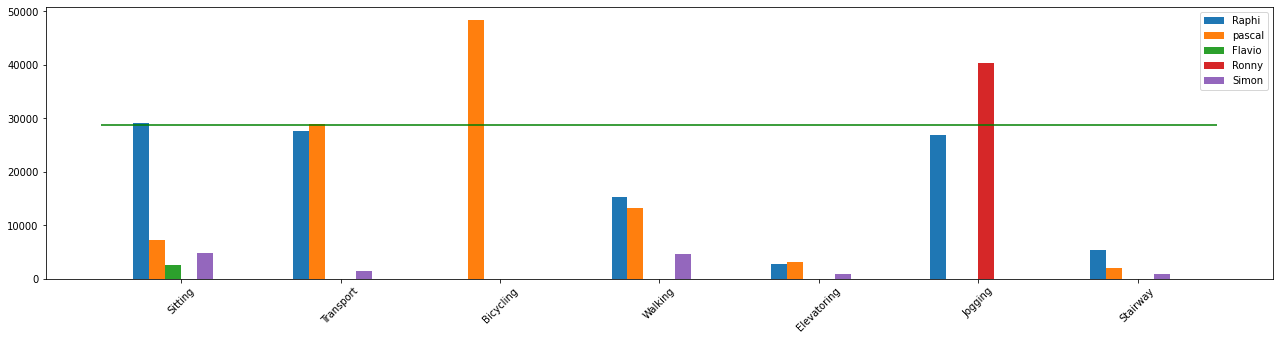

In [276]:
n = np.arange(len(df_clean['activity'].unique()))

fig, ax = plt.subplots(figsize=(22, 5))
names = []
for i, name in enumerate(df_clean['name'].unique()):
    ax.bar(n + (i/len(df_clean['name'].unique())/2 - 0.25), df_clean.loc[df_clean['name'] == name, 'activity'].value_counts().reindex(df_clean['activity'].unique(), fill_value=0), width=0.1)
    names.append(name)

# minline: 2h/5=24min, 1440s per person, 20meas/sec -> 28'800 measurements
plt.xticks(n, list(df_clean['activity'].unique()), rotation=45)
plt.legend(names)
ax.hlines(y=28800, xmin=-0.5, xmax=6.5, colors='green')
#plt.legend(a[1].unique())
plt.plot()

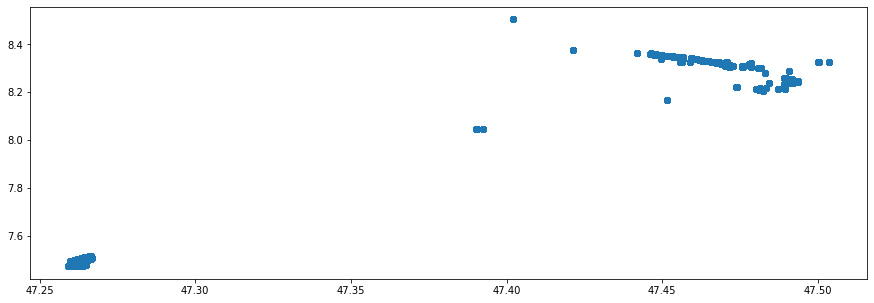

In [277]:
# coordinates visualization
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(df_clean['lat'].values, df_clean['long'].values)
#ax.hist(a[17].value_counts(), bins=50)
plt.show()